In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('ISLR-python/Notebooks/Data/College.csv')

In [39]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [40]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [42]:
df['Accept.Rate'] = df['Accept'] / df['Apps']

In [43]:
df = pd.get_dummies(df, columns = ['Private'])

In [44]:
X = df.drop(['Accept.Rate', 'Apps', 'Accept', 'Unnamed: 0', 'Private_No'], axis = 1)
y = df['Accept.Rate']

In [45]:
## Dividing the data into training and test set 
## 20 percent of the values are present in the test set 
## 80 percent of the values are present in the training set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.2)

In [46]:
len(X_train)

621

In [47]:
len(X_test)

156

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree

In [49]:
X_train.head()

,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
452,169,28,48,797,100,6000,3000,500,500,48,57,13.4,14,5557,61,1
351,176,26,52,624,128,11200,4208,500,1642,80,90,11.1,43,8317,51,1
68,292,22,53,881,55,10265,4725,560,875,68,73,13.2,24,8655,82,1
274,5873,25,72,24763,2717,9766,3990,600,2000,77,88,21.3,24,8686,68,0
12,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,1


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
## Performing the scaling operation where the values would 
## be converted such as the mean of the values is 0 and standard deviation is equal to 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [52]:
## Using random set of estimators to plot the tree and observe the values
model = GradientBoostingRegressor(n_estimators = 10)
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(n_estimators=10)

In [53]:
## Taking into consideration a subtree from the gradient boosted trees
sub_tree_5 = model.estimators_[5, 0]

In [54]:
sub_tree_5

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x25178A7B9D8)

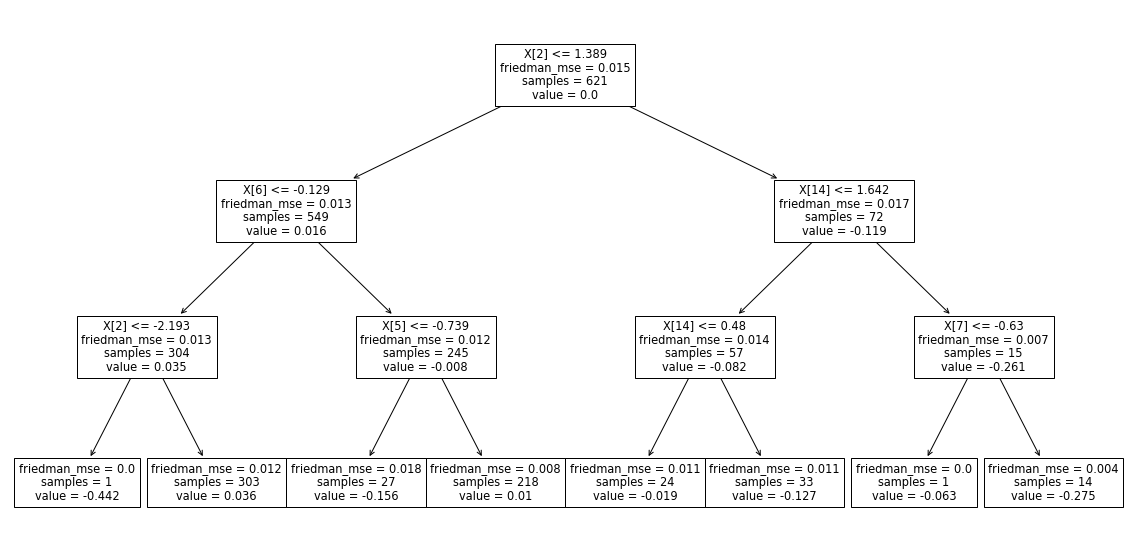

In [55]:
plt.figure(figsize = (20, 10))
plot_tree(sub_tree_5)
plt.show()

In [56]:
sub_tree_1 = model.estimators_[1, 0]

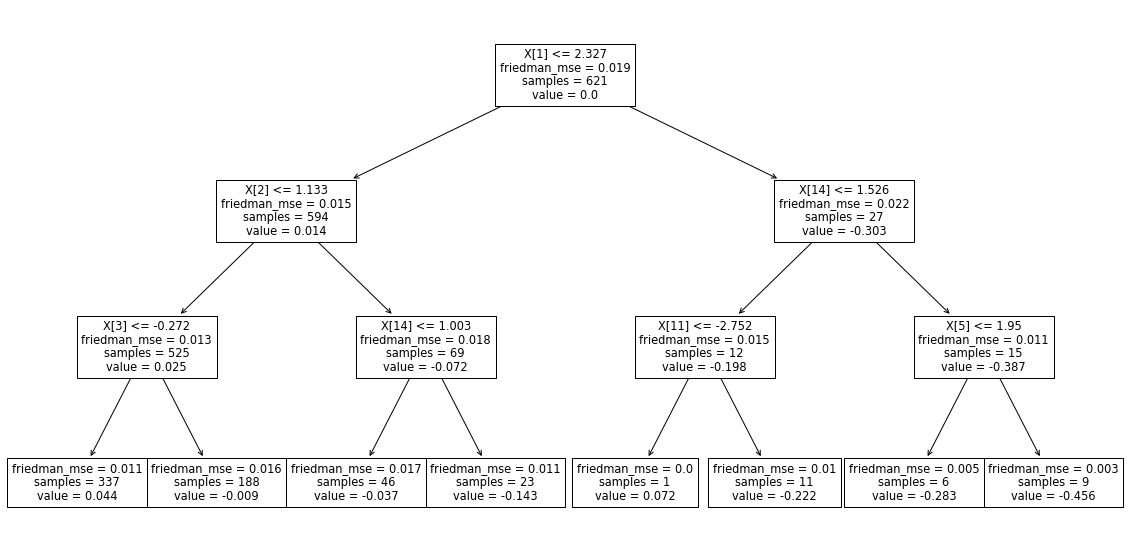

In [57]:
plt.figure(figsize = (20, 10))
plot_tree(sub_tree_1)
plt.show()

In [58]:
sub_tree_2 = model.estimators_[2, 0]

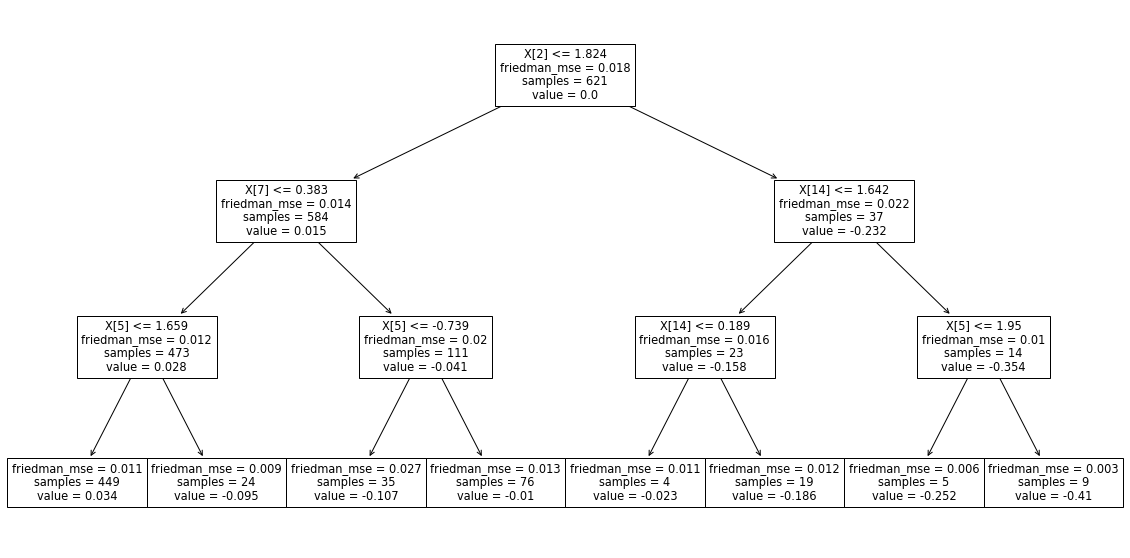

In [59]:
plt.figure(figsize = (20, 10))
plot_tree(sub_tree_2)
plt.show()

In [60]:
sub_tree_3 = model.estimators_[3, 0]

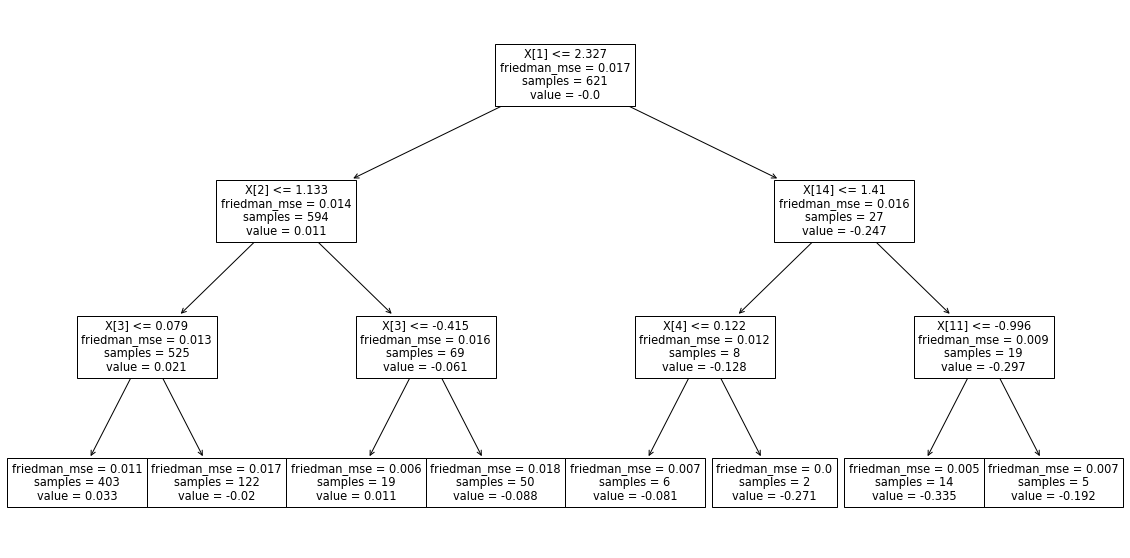

In [61]:
plt.figure(figsize = (20, 10))
plot_tree(sub_tree_3)
plt.show()

In [62]:
sub_tree_4 = model.estimators_[3, 0]

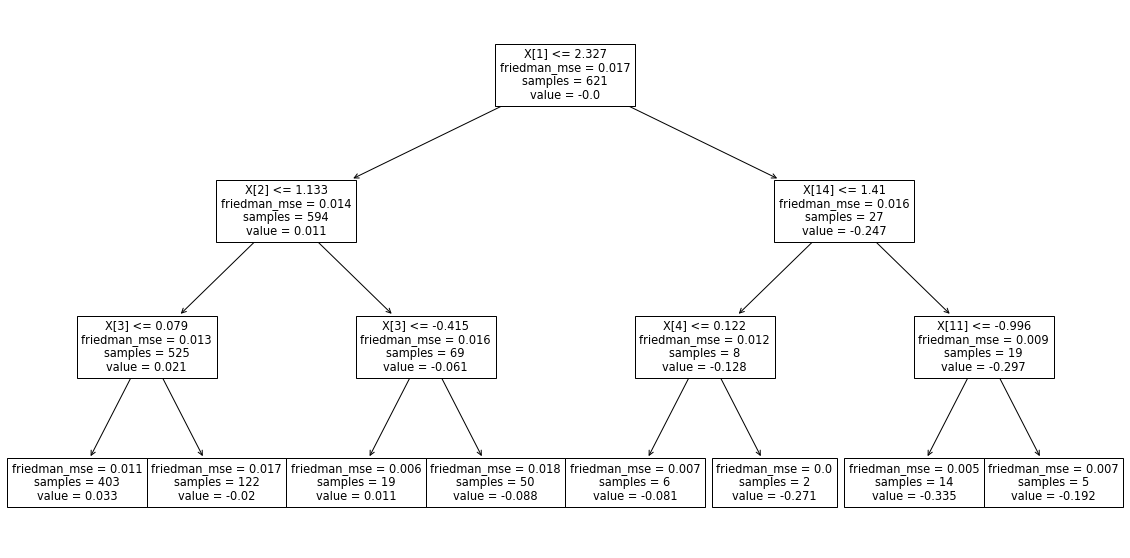

In [66]:
plt.figure(figsize = (20, 10))
plot_tree(sub_tree_4)
plt.show()

# b) 

We could see from the above how the values are split depending on the trees selected. The model would try to fit the errors which converts the high bias model to a low bias model respectively.  

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
## Making predictions for this gradient boosted tree with particular number of estimators
y_predictions = model.predict(X_test_scaled)

In [43]:
print("The Mean Squared Error (MSE) of the test prediction is: {}".format(mean_squared_error(y_predictions, y_test)))

The Mean Squared Error (MSE) of the test prediction is: 0.017404454015845124


In [44]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
## The set of values for the number of estimators
n_estimators = [10, 25, 50, 75, 100, 200]

## Defining the folds for cross-validation 
cv = 10

## Creating an empty list for storing the cross-validation values
cross_validation_score_values = []

## Iterating over all the elements from n_estimators
for estimators in tqdm(n_estimators):
    
    ## Fitting the gradient boosting decision tree for a particular number of estimators
    model = GradientBoostingRegressor(n_estimators = estimators)
    
    ## Taking the mean of the cross validation score for k folds 
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    cross_validation_score_values.append(cross_validation_score)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.01it/s]


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def lineplot_function(x_label, y_label, x_value, y_value, color1 = 'green', color2 = 'blue', figsize = (10, 10)):
    """
    Takes the x values and y values and plots the lineplot along with scatterplot
    """
    plt.figure(figsize = figsize)
    sns.lineplot(x = x_value, y = y_value, color = color1)
    sns.scatterplot(x = x_value, y = y_value, color = color2)
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    plt.title(f'{x_label} Vs. {y_label} values', fontsize = 15)
    plt.show()

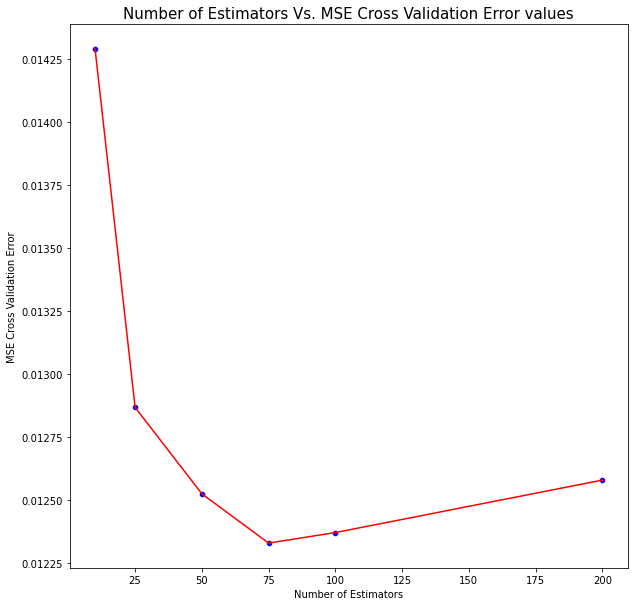

In [48]:
lineplot_function(x_value = n_estimators, y_value = cross_validation_score_values, x_label = "Number of Estimators",
                 y_label = "MSE Cross Validation Error", color1 = "red")

In [49]:
max_depth_values = [1, 2, 3, 5, 7, 10]
cv = 10
cross_validation_score_values = []
for max_depth in tqdm(max_depth_values):
    model = GradientBoostingRegressor(max_depth = max_depth)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    cross_validation_score_values.append(cross_validation_score)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.94s/it]


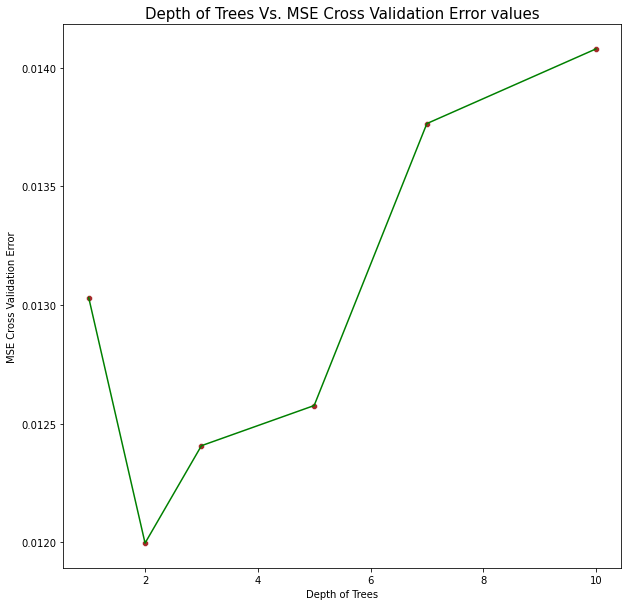

In [50]:
lineplot_function(x_value = max_depth_values, y_value = cross_validation_score_values, x_label = "Depth of Trees",
                 y_label = "MSE Cross Validation Error", color1 = "green", color2 = "brown")

In [51]:
min_samples_split_values = [2, 5, 7, 8, 10]
cv = 10
cross_validation_score_values = []
for min_samples_split in tqdm(min_samples_split_values):
    model = GradientBoostingRegressor(min_samples_split = min_samples_split)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    cross_validation_score_values.append(cross_validation_score)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.39s/it]


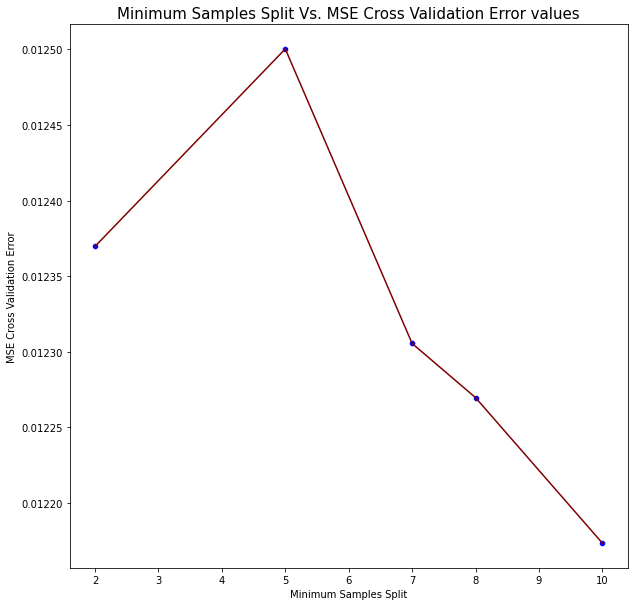

In [52]:
lineplot_function(x_value = min_samples_split_values, y_value = cross_validation_score_values, x_label = "Minimum Samples Split",
                 y_label = "MSE Cross Validation Error", color1 = "maroon", color2 = "blue")

In [53]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import time

In [54]:
## Defining the parameters for GridSearch in the next cells
parameters = [{'min_samples_split': min_samples_split_values, 'max_depth': max_depth_values, 'n_estimators': n_estimators}]

In [55]:
## Defining a variable that would store the starting time of the cell
start = time.time()

model = GradientBoostingRegressor()
gridsearch = GridSearchCV(model, parameters, scoring = 'neg_mean_squared_error')
gridsearch.fit(X_train_scaled, y_train)

## Defined a variable that would store the end time of the cell 
end = time.time()


## Prints the total Runtime of the cell 
print(f"The total Runtime of the cell is: {np.round(end - start, 2)}s")

The total Runtime of the cell is: 115.05s


In [56]:
print(gridsearch.best_params_)

{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [57]:
## Storing the best parameter values in variables 
best_max_depth = gridsearch.best_params_['max_depth']
best_min_samples_split = gridsearch.best_params_['min_samples_split']
best_estimators = gridsearch.best_params_['n_estimators']

In [58]:
## Using the Gradient Boosting Decision Tree model that contains the best parameters based on GridSearch 
model = GradientBoostingRegressor(max_depth = best_max_depth, min_samples_split = best_min_samples_split, 
                                 n_estimators = best_estimators)
model.fit(X_train_scaled, y_train)
y_predictions_best = model.predict(X_test_scaled)

In [59]:
print("The Mean Squared Error (MSE) of the test prediction is: {}".format(mean_squared_error(y_predictions_best, y_test)))

The Mean Squared Error (MSE) of the test prediction is: 0.01452296852571804


In [102]:
print("The indexes of the training data (columns) containing the feature importance values from highest to lowest: \n{}".format(np.flip(np.argsort(model.feature_importances_))))

The indexes of the training data (columns) containing the feature importance values from highest to lowest: 
[ 2  5  1 14  7  6  4  3  9 11 13  8 10  0 12 15]


In [103]:
importance_indexes = np.flip(np.argsort(model.feature_importances_))

In [104]:
important_features = []
for i in importance_indexes:
    important_features.append(X_train.columns[i])

In [105]:
importance_values = np.sort(model.feature_importances_)[::-1]

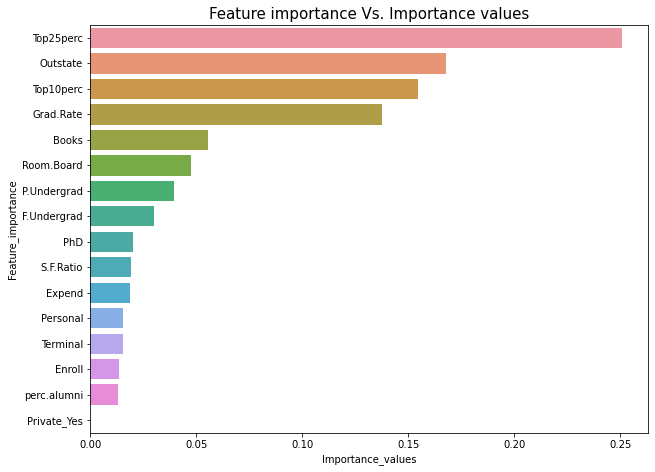

In [106]:
plt.figure(figsize = (10, 7.5))
sns.barplot(y = important_features, x = importance_values)
plt.xlabel('Importance_values')
plt.ylabel('Feature_importance')
plt.title("Feature importance Vs. Importance values", fontsize = 15)
plt.show()

## d)

From the above plots, it could be seen that the features "Top25Perc" and "Outstate" values are considered to be important featuers by our Gradient Boosting Decision Tree model. 